In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def generate_sine_wave(frequency, duration, sample_rate):
    """Generate data for a cycle of a sine wave."""
    num_samples = int(duration * sample_rate)
    t = np.linspace(0, duration, num_samples, endpoint=False)
    x = np.sin(2 * np.pi * frequency * t)
    return t, x

def calculate_fft(signal, sample_rate, fft_size):
    """Calculate the FFT of a signal."""
    fft_freqs = np.fft.fftfreq(fft_size, 1 / sample_rate)
    fft_values = np.fft.fft(signal, fft_size)
    return fft_freqs, fft_values

def apply_blackman_window(signal):
    """Apply Blackman window to the signal."""
    return np.blackman(len(signal)) * signal


[  0.         5.859375  11.71875  ... -17.578125 -11.71875   -5.859375]
(8192,)
[0.78565607+0.j         0.78682578+0.0578933j  0.79033395+0.11571623j ...
 0.79617764-0.1733985j  0.79033395-0.11571623j 0.78682578-0.0578933j ]
(8192,)


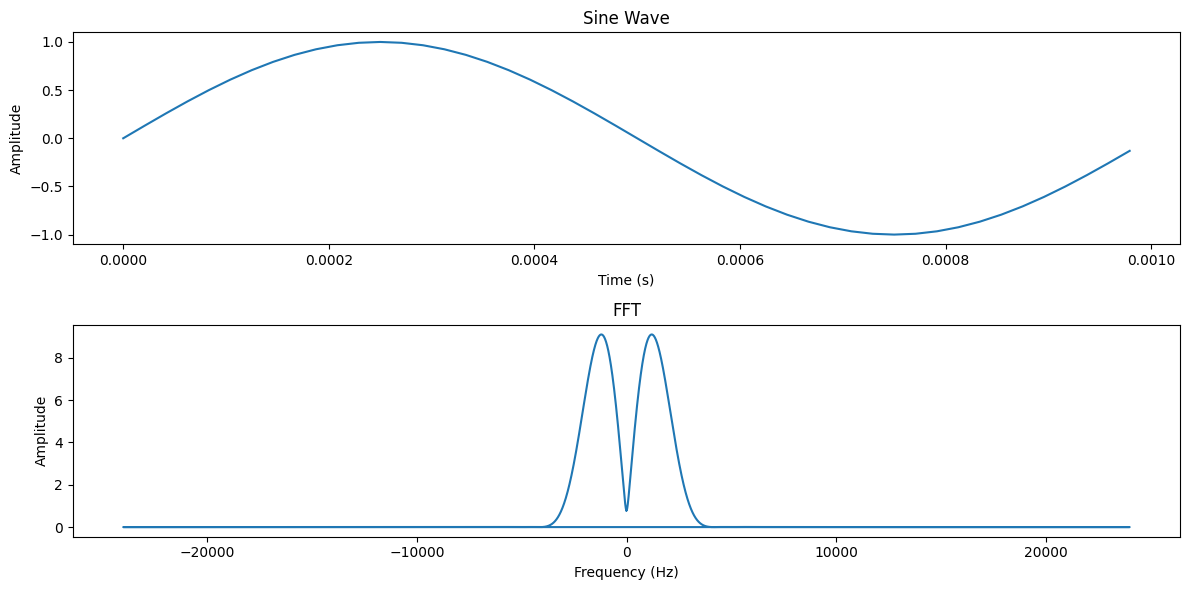

In [19]:
# Parameters
frequency = 1000  # Frequency of the sine wave in Hz
duration = 1/1000   # Duration of the sine wave in seconds
sample_rate = 48000  # Sampling rate in Hz
fft_size = 8192  # Size of the FFT

# Generate sine wave
time, signal = generate_sine_wave(frequency, duration, sample_rate)

# Apply Blackman window
signal_windowed = apply_blackman_window(signal)

# Calculate FFT
fft_freqs, fft_values = calculate_fft(signal_windowed, sample_rate, fft_size)

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(fft_freqs, np.abs(fft_values))
plt.title('FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
